# SIMULACIÓN | LABORATORIO 4


## Generación de número pseudo-aleatorios

In [1680]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy 
from IPython.display import display
import ipywidgets as widgets
import random

### El módulo Random de python 


**Ejercicio 1:**
- Defina lo que es una semilla y para qué sirve
- use random.random() para generar números aleatorios. 
- use una semilla con random.seed(semilla), y vuelva a ejecutar random.random()
- ¿qué ocurre si vuelve a definir la misma semilla y ejecutar random.random()?



Es un vector o numero utilizado para inicializar generadores pseudo aleatorios. Se utilizan para permitir la replicabilidad de un experimento que involuquen procesos con numeros generados de manera pseudo aleatoria 

In [3]:
random.random()

0.3700880309978033

In [999]:
random.seed(111)
random.random()

0.827170565342314

¿qué ocurre si vuelve a definir la misma semilla y ejecutar random.random()?

R:// 
se genera el mismo numero  

**Ejercicio 2:**
Pruebe las funciones y defina sus diferencias:

    - random.randint(a, b)
    - random.randrange(a, b)
    - random.uniform(a, b)
    

**la mayoria de las funciones que generan numeros de la libreria random generan numeros siguiendo la distribucion uniforme**

- randint(a,b) genera valores pseudoaleatorios enteros entre a y b, limites incluidos, se puede obtener el mismo resultado con random.randrange(a,b+1) 

In [1085]:
random.randint??

In [1263]:
random.randint(1,10)

1

- `random.randrange(a, b, step)` genera valores pseudo aleatorios enteros entre a y b, sin incluir el b. tambien acepta como argumento adicional un paso con el cual los posibles n valores a generarse quedan $n= a + paso * i$ con todas las $i >= 0$ con tal de que $a + paso * i < b$.  El valor por defecto para step en caso que no se entregue un valor para el es 1. el valor por defecto para a es 0, por lo que esta funcion puede ser llamada simplemente `random.randrange(b)`

In [1334]:
random.randrange(0, 20, 5)

15

In [1087]:
random.randrange??

In [1221]:
random.randrange(5)

4

`random.uniform(a,b)` genera numeros flotantes entre a y b 

In [1335]:
random.uniform??

In [1389]:
random.uniform(0, 0.2)

0.1859515758202397

### Clase NotSoRandom:

In [1490]:
class NotSoRandom(object):
    def seed(self, a=3):
        """Seed the world's most mysterious random number generator."""
        self.seedval = a
    def random(self):
        """Look, random numbers!"""
        self.seedval = (self.seedval * 3) % 19
        return self.seedval

_inst = NotSoRandom()
seed = _inst.seed
random = _inst.random


In [1491]:

a.seed(1234)

**Ejercicio 3:**
- use la semilla 1234 y genere números aleatorios hasta que se cumpla un ciclo completo. ¿Cuál resultó ser el periodo?
- Intente con otra semilla y busque completar un ciclo. 

Por la manera en la que  esta construido este generador en donde cada numero determina totalmente el numero siguiente, si un numero se repite, el ciclo culminó, por lo que se puede encontrar el periodo de la siguiente manera

In [1497]:
a = NotSoRandom()
a.seed(1234)
first_value=a.random() 
for i in range(1,50):
    if(a.random()==first_value):
        print("periodo: ",i)
        break
  #  print(i ,": ",a.random())


periodo:  18


In [1503]:
a.seed(3)
first_value=a.random() 

In [1524]:
b = NotSoRandom()
b.seed(999)
first_value=b.random() 
for i in range(1,50):
    if(b.random()==first_value):
        print("periodo: ",i)
        break
  


periodo:  18


In [1515]:
a.random() 

10

#### **Ejercicio 4:**
En este ejercicio vamos a comparar el generador de la biblioteca Random de Python con el generador de números pseudo-aleatorios congruencial lineal descrito en la sesión téórica. Para ello se pide lo siguiente:
1. Programe el generador de números pseudo-aleatorios congruencial lineal 
2. Extraiga secuencias del generador programado y del predefinido en Python, grafique en histogramas, compare y concluya.


In [1695]:
class GeneradorCongruencialLineal(object):
    def __init__(self, seed=1234):
        self.u = seed
    def next(self):
        self.u = (16807*self.u)%2147483647
        return self.u/2147483647

In [1746]:
a = GeneradorCongruencialLineal()
a.next()

0.009657739666131204

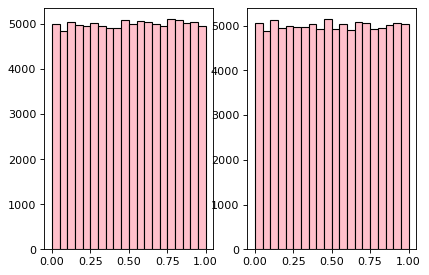

In [1865]:
random.seed(1234)
b = GeneradorCongruencialLineal()


list_congruencial_lineal = [b.next() for x in range(100000)]
list_aleat_py = [random.uniform(0, 1) for y in range(100000)]
fig, axs = plt.subplots(1, 2, figsize=(6, 4), dpi=80)
axs[1].hist(list_congruencial_lineal, color = 'pink', edgecolor = 'black', bins = 20)
axs[0].hist(list_aleat_py, color = 'pink', edgecolor = 'black', bins = 20);

Se puede concluir que ambas permiten generar valores aleatorios basadas en distribuciones uniformes 

#### **Ejercicio 5:**
Escoja una distribución de probabilidad continua.
1. Utilice un método predefinido en Python para generar una secuencia de valores pseudo-aleatorios provenientes de dicha distribución
2. Genere una secuencia considerando el algoritmo de la transformada inversa.
3. Grafique en histogramas y compare las secuencias en (1) y (2) utilizando el test de k-s

In [1752]:
def algoritmo_transformada_inversa_normal():
    

In [1778]:
scipy.stats.norm.rvs?

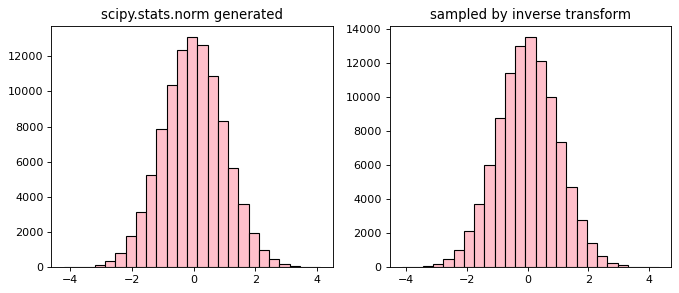

In [1822]:
Uniform_VA = [random.uniform(0, 1) for y in range(100000)]
norm_samples_by_inverse = [scipy.stats.norm.ppf(x) for x in Uniform_VA]
norm_values = scipy.stats.norm.rvs(size = 100000, random_state = 111)


#list_aleat_py = [algoritmo_transformada_inversa_normal() for y in range(100000)]

fig, axs = plt.subplots(1, 2, figsize=(10, 4), dpi=80)
axs[0].hist(norm_values, color = 'pink', edgecolor = 'black', bins = 25);
axs[0].set_title("scipy.stats.norm generated")

axs[1].hist(norm_samples_by_inverse, color = 'pink', edgecolor = 'black', bins = 25);
axs[1].set_title("sampled by inverse transform");

#axs[0].hist(list_aleat_py, color = 'pink', edgecolor = 'black', bins = 10);


In [1846]:
#test k-s

scipy.stats.kstest(norm_samples_by_inverse, norm_values)

KstestResult(statistic=0.003310000000000035, pvalue=0.6425314177603193)

#### **Ejercicio 6:**
Escoja una distribución de probabilidad discreta.
1. Utilice un método predefinido en Python para generar una secuencia de valores pseudo-aleatorios provenientes de dicha distribución
2. Genere una secuencia considerando el algoritmo de la transformada inversa.
3. Grafique en histogramas y compare las secuencias en (1) y (2). ¿Qué test sería adecuado utilizar en este caso?

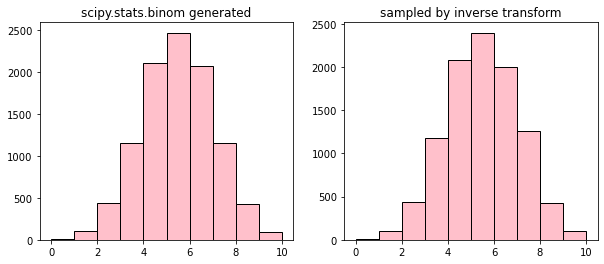

In [1843]:
Uniform_VA = [random.uniform(0, 1) for y in range(10000)]
binomial_samples_by_inverse = [scipy.stats.binom.ppf(x, 10, 0.5) for x in Uniform_VA]
binomial = scipy.stats.binom.rvs(10, 0.5, size=10000, random_state= 11)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].hist(binomial, color = 'pink', edgecolor = 'black', bins = 10);
axs[0].set_title("scipy.stats.binom generated")

axs[1].hist(binomial_samples_by_inverse, color = 'pink', edgecolor = 'black', bins = 10);
axs[1].set_title("sampled by inverse transform");

In [1851]:
scipy.stats.ttest_rel(binomial_samples_by_inverse, binomial)

Ttest_relResult(statistic=0.4371987917317481, pvalue=0.6619766277097816)

In [1857]:
scipy.stats.kstest(binomial_samples_by_inverse, binomial)

KstestResult(statistic=0.011, pvalue=0.5806415540561973)

In [1860]:
scipy.stats.mood(binomial_samples_by_inverse, binomial)

(-3.683102945853186, 0.0002304120540334543)

In [1862]:
stat, p, med, tbl = scipy.stats.median_test(binomial_samples_by_inverse, binomial)

In [1863]:
p

0.5592588441513432

**Referencias:**
    
- Generating Random Data in Python (Guide): https://realpython.com/python-random/

- Generación de números pseudo-aleatorios: https://www.youtube.com/watch?v=C82JyCmtKWg